In [1]:
import keras

In [2]:
from keras import models, layers
from keras import backend

In [3]:
class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()
        
        self.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
        self.add(layers.Conv2D(64, kernel_size=(3,3),activation='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2,2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dense(num_classes, activation='softmax'))
        
        self.compile(loss=keras.losses.categorical_crossentropy,optimizer='rmsprop', metrics=['accuracy'])

In [4]:
from keras import datasets

class DATA():
    def __init__(self):
        num_classes = 10
        
        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        
        img_rows, img_cols = x_train.shape[1:]
        print(img_rows, img_cols)
        
        if(backend.image_data_format() == 'channels_first'):
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)
            
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        
        x_train /= 255
        x_test /= 255
        
        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)
        
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test
        
            

In [6]:
from skeras import plot_acc, plot_loss
import matplotlib.pyplot as plt

28 28
Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1792 - accuracy: 0.9444 - val_loss: 0.0594 - val_accuracy: 0.9830
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0516 - accuracy: 0.9839 - val_loss: 0.0446 - val_accuracy: 0.9870
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0341 - accuracy: 0.9896 - val_loss: 0.0507 - val_accuracy: 0.9856
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0240 - accuracy: 0.9924 - val_loss: 0.0430 - val_accuracy: 0.9876
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0177 - accuracy: 0.9941 - val_loss: 0.0425 - val_accuracy: 0.9883
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.0395 - val_accuracy: 0.9898
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0098 - accuracy: 0.9968 - val_loss: 0.0490 - val_accuracy: 0.9895


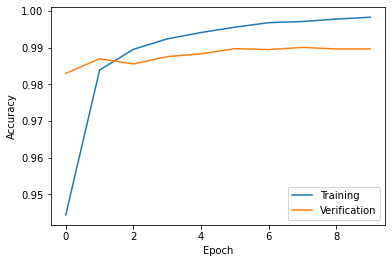

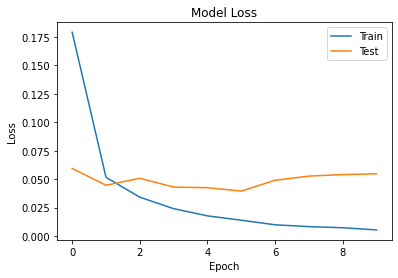

In [7]:
batch_size = 128
epochs = 10

data = DATA()
model = CNN(data.input_shape, data.num_classes)

history = model.fit(data.x_train, data.y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

score = model.evaluate(data.x_test, data.y_test)
print()

print('Test Loss : ', score[0])
print('Test Accuracy: ', score[1])

plot_acc(history)
plt.show()
plot_loss(history)
plt.show()